# Demo Notebook for pyNmie

In [1]:
# Import modules
import numpy as np
import NMie as nmie
import matplotlib.pyplot as plt

In [9]:
# Define Wavelength range for calculation
wl_sh = 300
wl_lo = 900
nums = 101
wavelength = np.linspace(wl_sh,wl_lo,nums)

Define the core-shell particle

20nm Ag Core with 10nm Au shell immersed in water

In [10]:
dAg = 20 # Diameter of Ag core
nAg = 0.051585+1j*3.9046 # @587.6nm
dAu = 10 # Thickness of Au shell
nAu = 0.27732+1j*2.9278 # @587.6nm
nH2O = 1.3325 # @587.6nm

Refractive indices must have same shape as wavelength


In [11]:
nAg *=np.ones(np.shape(wavelength))
nAu *=np.ones(np.shape(wavelength))
nH2O*=np.ones(np.shape(wavelength))

Pack the diameters and refractive indices

diameter list has 1(core) + NUMBER_OF_SHELLS elements

d = [d_core, d_shell1, d_shell2, ..., d_shellN]

Refractive index tuple 1(core) + NUMBER_OF_SHELLS + 1(ambient) elements

n = [n_core, n_shell1, n_shell2, ..., n_shellN, n_ambient]

In [12]:
dias = [dAg,dAu]
n = [nAg, nAu, nH2O]

Define the particle as NMie class with the necessary inputs

In [13]:
particle = nmie.NMie(diameters = dias, refind = n, wl = wavelength)

The class elements NMie.qsca, NMie.qabs and NMie.qext hold the scattering, absorption and extinction cross sections

Furthermore, the electric and magnetic contributions to the respective cross sections can be accessed.
The arrays:
- NMie.qsca_el, NMie.qabs_el, NMie.qext_el
- NMie.qsca_ma, NMie.qabs_ma and NMie.qext_ma
hold the electric and magnetic modes.

e.g. the electric dipole and quadropole modes of the scattering cross section can be accesses by
- electric_dipole_mode = NMie.qsca_el[:,0]
- electric_quadrupole_mode = NMie.qsca_el[:,1]

The same holds for the magnetic modes and the other cross sections

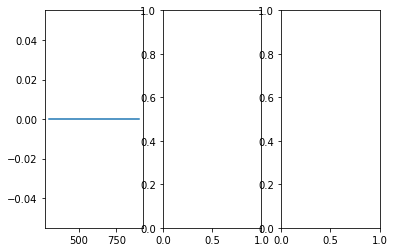

In [14]:
fig,axs = plt.subplots(nrows = 1, ncols = 3)
ax = axs[0]
ax.plot(wavelength, particle.qsca, color = 'C0', label = 'Scattering Cross Section')